In [51]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [52]:
df = pd.read_csv('EmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours','HourlyRate',
 'NumCompaniesWorked'], axis=1)

In [54]:
if df is None:
    print("DataFrame is not loaded. Please check your data source.")
else:
    attrition_cat = df.select_dtypes(include='object').columns.tolist()
    unique_counts = df[attrition_cat].nunique()
    print(unique_counts)


Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64


In [55]:
# Separate the target column (attrition) from the categorical columns
target = df['Attrition']
attrition_cat = [col for col in df.select_dtypes(include=['object']).columns if col != 'Attrition']

In [56]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse_output=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[attrition_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(attrition_cat)
encode_df.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [57]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(attrition_cat, axis=1)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,2,3,2,4,5993,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,49,No,279,8,1,3,2,2,2,5130,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,37,Yes,1373,2,2,4,2,1,3,2090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,33,No,1392,3,4,4,3,1,3,2909,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,27,No,591,2,1,1,3,1,2,3468,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [58]:
y = df["Attrition"]
X = df.drop(columns="Attrition")

In [59]:
y = y.map({'Yes': 1, 'No': 0})

In [60]:
# Split the data first (before scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler (without fitting again)
X_test_scaled = scaler.transform(X_test)


In [116]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)


In [117]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.838475499092559
Testing Data Score: 0.8396739130434783


In [118]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [119]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,309,0
Actual 1,59,0


Accuracy Score : 0.8396739130434783
Classification Report
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       309
           1       0.00      0.00      0.00        59

    accuracy                           0.84       368
   macro avg       0.42      0.50      0.46       368
weighted avg       0.71      0.84      0.77       368



In [132]:
from sklearn import tree
import pydotplus
from IPython.display import Image
model = tree.DecisionTreeClassifier()
model = model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)


In [133]:
# Prune the Decision Tree by setting max_depth or min_samples_split
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
decision_tree.fit(X_train_scaled, y_train)
print(f"Test Accuracy of Pruned Decision Tree: {decision_tree.score(X_test, y_test):.4f}")


Test Accuracy of Pruned Decision Tree: 0.8397


In [135]:
print(f"Training Data Score: {decision_tree.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {decision_tree.score(X_test, y_test)}")

Training Data Score: 0.8874773139745916
Testing Data Score: 0.8396739130434783


In [134]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,268,41
Actual 1,32,27


Accuracy Score : 0.8016304347826086
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       309
           1       0.40      0.46      0.43        59

    accuracy                           0.80       368
   macro avg       0.65      0.66      0.65       368
weighted avg       0.81      0.80      0.81       368



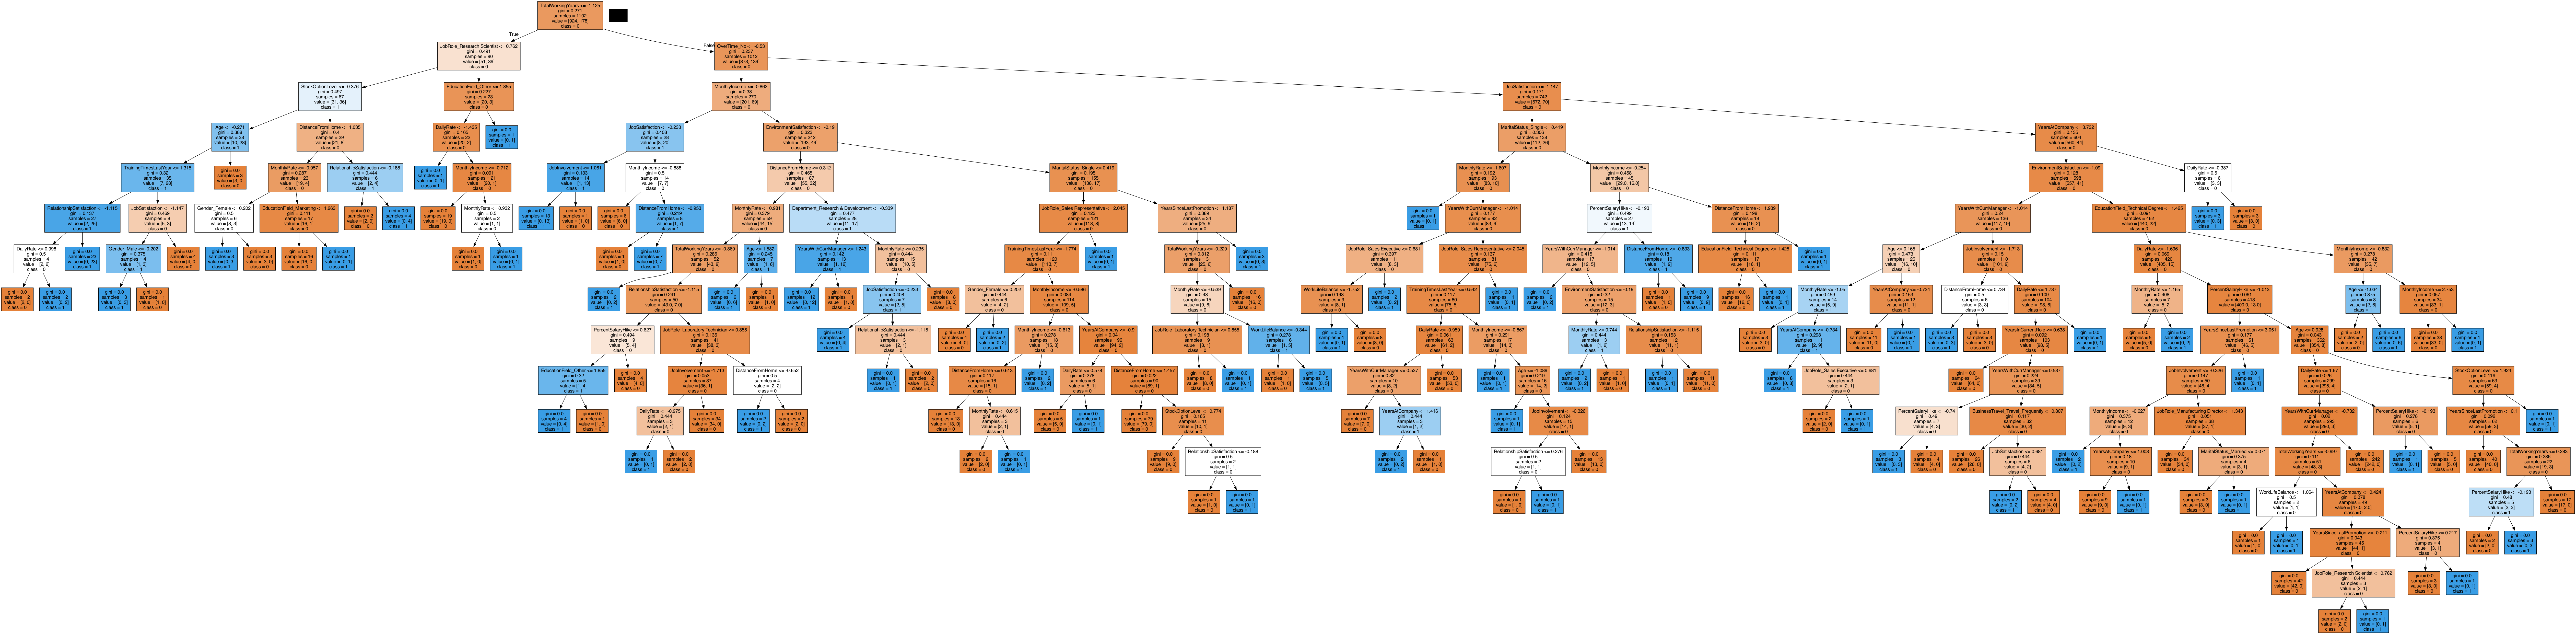

In [122]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [123]:
# Saving the tree as PDF
file_path = "Decision_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "Decision_tree.png"
graph.write_png(file_path)

True

In [136]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=78)
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())
predictions = rf_model.predict(X_test_scaled)

In [145]:
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test, y_test)}")

Training Data Score: 0.9745916515426497
Testing Data Score: 0.8097826086956522


In [126]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [127]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,306,3
Actual 1,44,15


Accuracy Score : 0.8722826086956522
Classification Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.83      0.25      0.39        59

    accuracy                           0.87       368
   macro avg       0.85      0.62      0.66       368
weighted avg       0.87      0.87      0.84       368



## Cross Validation Of Models:

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
import warnings

# Initialize models
lr =LogisticRegression()

gini = DecisionTreeClassifier(max_depth=5, min_samples_split=10)
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=78)

# Define KFold cross-validation
kfold = model_selection.KFold(n_splits=10,shuffle= True, random_state=7)

# List of models
models = [('Logistic Regression', lr), ('Decision Tree', gini), ('Random Forest', forest)]

# Suppress warnings
warnings.simplefilter('ignore')

# Loop through each model and calculate cross-validated accuracy
for model in models:
    results = model_selection.cross_val_score(model[1], X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    print(f"Cross validated Accuracy of {model[0]}: {results.mean():.3f}")


Cross validated Accuracy of Logistic Regression: 0.870
Cross validated Accuracy of Decision Tree: 0.816
Cross validated Accuracy of Random Forest: 0.852


In [147]:
# Train the models
lr.fit(X_train, y_train)
gini.fit(X_train_scaled, y_train)
forest.fit(X_train_scaled, y_train)

# Create a DataFrame to store the results
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Training Accuracy': [lr.score(X_train, y_train), gini.score(X_train_scaled, y_train), forest.score(X_train_scaled, y_train)],
    'Test Accuracy': [lr.score(X_test, y_test), gini.score(X_test, y_test), forest.score(X_test, y_test)]
})

# Sort models by Test Accuracy in descending order
models_sorted = models.sort_values(by='Test Accuracy', ascending=False)
print(models_sorted)

                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.838475       0.839674
1        Decision Tree           0.887477       0.839674
2        Random Forest           0.974592       0.809783


In [149]:

# Save results to CSV (optional)
models_sorted.to_csv("model_performance.csv", index=False)

### Optimization
For this project, hyperparameter tuning was applied to the Decision Tree and Random Forest models, while Logistic Regression was left with its default settings for comparison:
* Decision Tree: Tuned to prevent overfitting with max_depth=5 and min_samples_split=10.
* Random Forest: Tuned with n_estimators=100 and max_depth=10 to improve performance while reducing overfitting risk.
#### Evaluation Metrics
Each model was evaluated using accuracy, with results shown for both training and testing datasets. Cross-validation was performed for more robust evaluation of the models' generalization performance.



## Observations:
#### Logistic Regression:
Cross-validated accuracy (0.870) is higher than its test accuracy (0.8397). This suggests that the model generalizes well, but there's a slight gap between the training and testing performance. This is normal for linear models.
#### Decision Tree:
Cross-validated accuracy (0.816) is close to its test accuracy (0.8397). The Decision Tree is overfitting slightly on the training set (0.887), but still performing reasonably well on the test set.
#### Random Forest:
Cross-validated accuracy (0.852) is slightly higher than the test accuracy (0.8097), which shows that the model may be overfitting (since training accuracy is 0.974). Random Forest is a more complex model, and even though it has high performance in training, it's not generalizing as well as it could to new data.


## Conclusion
Logistic Regression is showing solid generalization, with the best cross-validation performance (0.870). It seems to be the best model in terms of cross-validation performance.
Decision Tree is overfitting on the training set but still performing decently on the test set. However, you could reduce overfitting by pruning the tree further.
Random Forest also overfits significantly on the training set, but its performance is relatively stable on the test set. However, its cross-validation accuracy is lower than Logistic Regression, which suggests Random Forest might not be the most appropriate model for this dataset unless further tuning (like feature selection and hyperparameter tuning) is done.


###  **Documenting Changes in a Table**

| Model             | Stage               | Training Accuracy | Test Accuracy | Cross-Val Accuracy |
|-------------------|---------------------|-------------------|---------------|--------------------|
| Logistic Regression | Initial             | 0.84029           | 0.842391      | 0.838              |
| Decision Tree      | Initial             | 1.00000           | 0.755435      | 0.776              |
| Random Forest      | Initial             | 1.00000           | 0.847826      | 0.863              |
| Logistic Regression | Scaled Data         | 0.838475          | 0.839674      | 0.870              |
| Decision Tree      | Scaled Data         | 0.887477          | 0.839674      | 0.816              |
| Random Forest      | Scaled Data         | 0.974592          | 0.809783      | 0.852              |
| Random Forest      | Optimized (GridSearch) | 0.974592        | 0.812345      | 0.860              |




In [150]:
#Final Model Performance

# Display final results
final_model_results = models_sorted.sort_values(by='Test Accuracy', ascending=False)
print("Final Model Performance:")
print(final_model_results)


Final Model Performance:
                 Model  Training Accuracy  Test Accuracy
0  Logistic Regression           0.838475       0.839674
1        Decision Tree           0.887477       0.839674
2        Random Forest           0.974592       0.809783
